# Outliers (valores atípicos)

Mientras estamos desarrollando nuestro análisis de datos, ya sea con un objetivo puro de análisis o para realizar un preprocesamiento de datos antes de utilizar nuestros algoritmos de predicción, podemos encontrarnos algunos valores que, debido a su naturaleza, deberemos tener en consideración para que no afecten nuestro estudio. Dentro de este grupo destacan los valores nulos, que acabamos de ver en el notebook anterior, y los valores atípicos (o *outliers*), que los veremos a continuación.

En este caso, a diferencia de los valores nulos, donde es más común referirse a ellos como nulos en lugar de missings, en el caso de los valores atípicos se suele optar por el termino anglosajón "outliers".

## Conociendo a los outliers

Según Wikipedia:

>En estadística, un valor atípico (en inglés *outlier*) es una observación numéricamente distante del resto de los datos, haciendo que las estadísticas derivadas de los conjuntos de datos que incluyen este tipo de valores serán frecuentemente engañosas.


La definición anterior sugiere que el valor atípico es algo que es diferente de la multitud, del resto de datos. Pero, si bien es cierto que a menudo se dice que cada uno tenemos que ser uno mismo, en este caso puede que no sea tna bueno salirse de lo normal.

<br>

Comencemos por algo sencillo. Fíjate en la siguiente lista de valores, ¿ves algo diferente?

In [176]:
valores = [15, 16, 19, 18, 54, 17, 17, 11, 19]
valores

[15, 16, 19, 18, 54, 17, 17, 11, 19]

Efectivamente, hay un valor que se sale de lo común. Si nos fijamos, todos los datos están entre 15 y 20... Bueno, ¡¡todos menos el 54!! Se trata de un outlier.

## Datos y outliers

Ahora que ya sabemos que es un outlier, nos pueden venir muchas preguntas a la cabeza como, por ejemplo, "¿cómo se ha metido ese valor ahí?".

Un proyecto de análisis de datos siempre comienza con la obtención de datos a analizar, y es aquí cuando estos truhanes aprovechan para colarse en nuestros datos. Son tan pillos que sería casi imposible detectarlos en este punto, ya que pueden aprovechar un fallo durante la recopilación de los datos o, simplemente, puede que sean así por naturaleza, de modo que indiquen cierta variación en nuestros datos.

Pero dejemos de hablar y veamos datos, quiero ver datos. En este caso, vamos a utilizar como ejemplo un conjunto de datos de fútbol que... No, siempre fútbol, no. Mejor un ejemplo con jugadores de cricket. Vamos a suponer que estamos trabajando como analistas deportivos y queremos estudiar el desempeño del equipo indio de cricket, que lo haremos a partir de los puntos de cada jugador (cuyos nombres son totalmente reales):

In [177]:
import pandas as pd
scores = pd.DataFrame([{"Player": "Player1", "Score": 500},
                      {"Player": "Player2", "Score": 350},
                      {"Player": "Player3", "Score": 10},
                      {"Player": "Player4", "Score": 450},
                      {"Player": "Player5", "Score": 300}])
scores

,Player,Score
0,Player1,500
1,Player2,350
2,Player3,10
3,Player4,450
4,Player5,300


Si nos fijamos en los datos, podemos observar que todos los jugadores salvo "Player3" han conseguido puntuaciones de 300 o mayores, mientras que "Player3" solo ha logrado 10, lo que puede significar que o bien nos hemos equivocado al apuntar su puntuación o bien es que este jugador debería plantearse cambiar de deporte.

Ahora que sabemos que los valores atípicos pueden ser un error o simplemente una variación, ¿cómo decidimos si son importantes o no? Bueno, es bastante simple: si son el resultado de un error, podemos ignorarlos; pero si es solo una variación en los datos, deberíamos pensar un poco más. Antes de tratar de entender si ignorar los valores atípicos o no, debemos conocer las formas de identificarlos.

## Identificando valores atípicos

En vista de lo anterior, podríamos pensar que esto es pan comido, echo un vistazo a los datos y saco los que se salgan un poco y ya, como acabamos de hacer para el ejemplo del cricket.

Bueno... Pues no. Ahora estábamos utilizando un conjunto de datos de 5 registros y 2 columnas, pero normalmente tendremos más, mucho más. Imagínate que te plantas con un conjunto de datos de +500 columnas y +10 mil filas, ¿también podrías encontrar los outliers manualmente a simple vista? A ver, poder podrías, pero echarías un buen rato, así que mejor utilizar métodos gráficos o estadísticos que nos faciliten el trabajo. En este notebook discutiremos algunos de ellos.

<br>

Para ello, comenzaremos con un dataset de los precios de las casas de Boston, el cual está incluido en la librería ``sklearn``, que en el futuro será una de nuestras mejores amigas, cuando nos pongamos con el ``feature engineering`` y veamos los algoritmos de aprendizaje.
Entonces, comencemos.

In [178]:
from sklearn.datasets import load_boston

boston = load_boston()
x = boston.data
columns = boston.feature_names

#Creamos el DataFrame:
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
print("Filas: %s, Columnas: %s" %(boston_df.shape))
boston_df.head()

Filas: 506, Columnas: 13


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Las características que mostramos en el conjunto de datos se utilizarán para buscar cualquier valor atípico. Mirando los datos anteriores, parece que solo tenemos valores numéricos, es decir, no necesitamos hacer ningún formateo de datos. (Música épica).

Podemos diferenciar dos tipos de análisis para encontrar los valores atípicos: univariante (análisis de outliers de una variable) y multivariante (análisis de outliers de dos o más variables). Para simplificar las cosas, comenzaremos con el método básico de detección de valores atípicos y avanzaremos lentamente hacia métodos más avanzados.

## Análisis gráfico

En este apartado veremos cómo detectar outliers de forma visual, para lo que utilizaremos ciertas representaciones gráficas. No te preocupes si no las entiendes todavía, al final de este bloque (Bloque 1 - Data Analysis) veremos un montón de formas de representar los datos. Además, para matar el gusanillo, en 2 notebooks veremos una introducción al análisis exploratorio, para lo que introduciremos ciertas visualizaciones. Pero ahora, centrémonos en los outliers:


### Diagrama de caja (boxplot)

Según Wikipedia:

>También conocido como diagrama de caja y bigote, box plot, box-plot o boxplot. Es un método estandarizado para representar gráficamente una serie de datos numéricos a través de sus cuartiles. De esta manera, el diagrama de caja muestra a simple vista la mediana y los cuartiles de los datos, pudiendo también representar los valores atípicos de estos como puntos individuales.

La definición anterior sugiere que si hay un valor atípico, se trazará como un punto en el diagrama de caja, agrupando en cajas el resto de la población. 

Veámoslo con un ejemplo. Para ello, utilizaremos la librería ``seaborn``, que será oficialmente presentada en futuros notebooks:

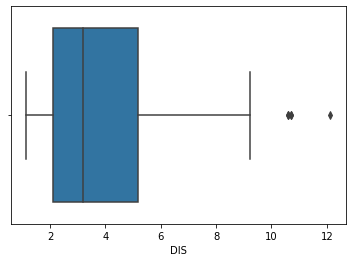

In [179]:
import seaborn as sns

# Por ejemplo, representemos la columnas "DIS"
sns.boxplot(x=boston_df['DIS'])

Como podemos observar, el diagrama de caja anterior muestra tres puntos entre 10 y 12. Estos son los valores atípicos, ya que no están incluidos en el cuadro de otra observación, es decir, no están cerca de los cuartiles.


De este modo, estamos analizando los valores atípicos univariantes, es decir, estamos usando la columna ``DIS`` solo para verificar sus valores atípicos, sin tener en cuenta a nadie más. Sin embargo, también podemos hacer análisis de valores atípicos multivariantes.

¿Y cómo hacemos esto? ¿Podemos hacerlo con el diagrama de caja? Bueno, la respuesta más correcta sería depende. Si tuviera valores categóricos, podríamos usarlos con cualquier variable continua y hacer un análisis de valores atípicos multivariante. Lamentablemente, como no tenemos variables categóricas (recordemos que son todas numéricas), mejor olvidarnos de usar el diagrama de caja para este análisis de valores atípicos multivariante.

## Gráfico de dispersión (scatter plot)

Según Wikipedia:

> Un diagrama de dispersión, gráfica de dispersión o gráfico de burbujas es un tipo de diagrama matemático que utiliza las coordenadas cartesianas para mostrar los valores de dos variables para un conjunto de datos. Los datos se muestran como una colección de puntos, cada uno con el valor de una variable que determina la posición en el eje horizontal y el valor de la otra variable que determina la posición en el eje vertical.

Como sugiere la definición, el diagrama de dispersión es la colección de puntos que muestra valores para dos variables. Podemos intentar dibujar un diagrama de dispersión para dos variables de nuestro conjunto de datos de vivienda.

Veamos un ejemplo con las columnas ``INDUS`` y ``TAX``:

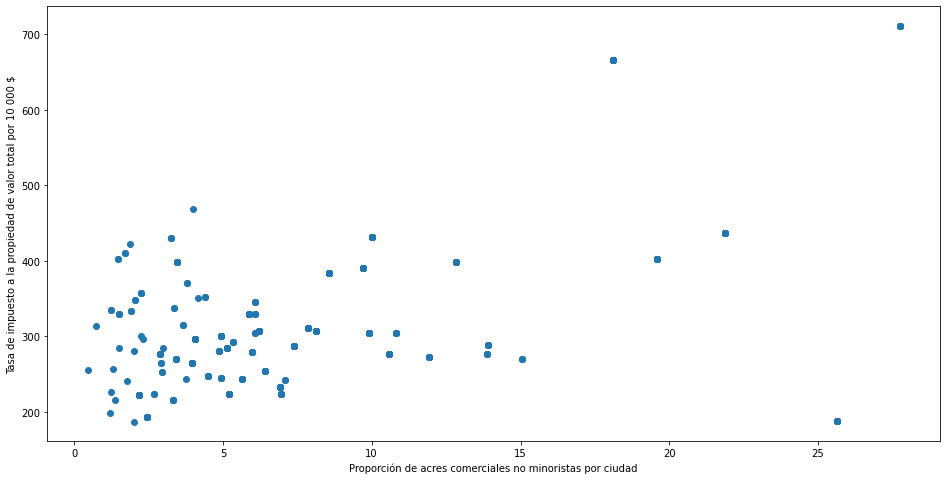

In [180]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(boston_df['INDUS'], boston_df['TAX'])
ax.set_xlabel('Proporción de acres comerciales no minoristas por ciudad')
ax.set_ylabel('Tasa de impuesto a la propiedad de valor total por 10 000 $')
plt.show()

Observando este gráfico, podemos ver que la mayoría de los puntos de datos se encuentran en el lado inferior izquierdo. Sin embargo, también vemos que hay alguno que se diferencia del resto aislándose hacia arriba a la derecha.

## Análisis matemático

Hasta ahora, hemos visto cómo detectar outliers de la manera sencilla, con gráficos. Sin embargo, la más útil vendrá por la parte matemática, ya que nos permitirá obtener programáticamente qué datos son más propensos a ser outliers y, posteriormente, aplicarles algún tratamiento.

### Z score (unidad tipificada)

Según Wikipedia:

> El término unidad tipificada, variable centrada reducida, variable estandarizada o normalizada se utiliza en estadística para comparar datos procedentes de diferentes muestras o poblaciones y se define como el número de desviaciones típicas que un valor dado toma con respecto a la media de su muestra o población.

La intuición detrás del Z-score es describir cualquier punto de datos encontrando su relación con la desviación estándar y la media del grupo de puntos de datos. Lo que representa el valor obtenido a través de la unidad tipificada es el equivalente en una distribución normal, es decir, una distribución de media 0 y desviación estándar igual a 1.


Entonces, ¿cómo nos puede ayudar esto a identificar los valores atípicos? Bueno, dado que al calcular el Z-score estamos escalando y centrando los datos, podríamos obtener los puntos de datos que estén demasiado lejos de cero. Estos puntos se tratarán como valores atípicos. En la mayoría de los casos, se utiliza un umbral de 3 o -3, es decir, si el valor del Z-score es mayor o menor que 3 o -3 respectivamente, ese punto de datos se identificará como valor atípico.

Para implementarlo en nuestros códigos, utilizaremos una función definida en la biblioteca ``scipy``:

In [181]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(boston_df))
print(z)

[[0.41978194 0.28482986 1.2879095  ... 1.45900038 0.44105193 1.0755623 ]
 [0.41733926 0.48772236 0.59338101 ... 0.30309415 0.44105193 0.49243937]
 [0.41734159 0.48772236 0.59338101 ... 0.30309415 0.39642699 1.2087274 ]
 ...
 [0.41344658 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.98304761]
 [0.40776407 0.48772236 0.11573841 ... 1.17646583 0.4032249  0.86530163]
 [0.41500016 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.66905833]]


Solamente con lo que estamos viendo aquí sería difícil sacar a ojo cuáles son los outliers. Para ello, tendremos que aplicar un filtro, que será el umbral que hemos comentado anteriormente cuando decíamos que se consideraría outlier si estuviera fuera del rango [-3, 3]. Como hemos calculado el valor absoluto, simplemente tendremos que quedarnos con los datos mayores que 3 para encontrar los outliers.

Hemos visto diferentes formas de atacar este problema de filtrado, pero en este caso utilizaremos la función ``where`` de NumPy:

In [182]:
umbral = 3
print(np.where(z > umbral))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

Lo que nos devuelve este filtro es una tupla con 2 arrays que hacer referencia a la posición de cada uno de los outliers, donde el primer array indica el número de fila, y el segundo, el de columna:

In [183]:
print(z[55][1])

3.375038763517309


Así que el registro número 55 de la columna 1 (``ZN``) es un outlier. Y así con el resto de los valores cuyas posiciones hemos sacado anteriormente.

## IQR-score (Rango intercuartílico)

El diagrama de caja usa el método basado en el Rango intercuartílico para mostrar los datos y valores atípicos. Sin embargo, para obtener una lista de valores atípicos identificados, necesitaremos usar la fórmula matemática y recuperar los datos atípicos.

Según Wikipedia:

> El rango intercuartílico es una medida de variabilidad adecuada cuando la medida de posición central empleada ha sido la mediana. Se define como la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1), es decir: RQ = Q3 - Q1. A la mitad del rango intercuartil se le conoce como desviación cuartil (DQ), y es afectada muy poco por cuentas extremas. Esto lo hace una buena medida de dispersión para distribuciones sesgadas: DQ = RQ/2= (Q3 - Q1)/2.
>
> Se usa para construir los diagramas de caja y bigote (box plots) que sirven para visualizar la variabilidad de una variable y comparar distribuciones de la misma variable; además de ubicar valores extremos.
>
> Es una medida de dispersión similar a la desviación típica o varianza, pero es mucho más robusta ante outliers.


El IQR es algo similar al Z-score en términos de encontrar la distribución de datos y luego mantener un umbral para identificar el valor atípico.
Podemos combinar el diagrama de caja con IQR y usarlo para encontrar la lista de valores atípicos como hicimos con el cálculo de la unidad tipificada.

En primer lugar, calcularemos el IQR:

In [184]:
Q1 = boston_df.quantile(0.25)
Q3 = boston_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


Como ahora tenemos los valores de IQR, podemos pasar a detectar los outliers. Para ello, aplicaremos al DataFrame una máscara que nos filtrará los valores que se salgan del intervalo definido por **[Q1 - 1.5 IQR, Q3 + 1.5 IQR]**.

In [185]:
(boston_df < (Q1 - 1.5 * IQR)) | (boston_df > (Q3 + 1.5 * IQR))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False


Ahora que sabemos cómo detectar los valores atípicos, es importante comprender si es necesario eliminarlos o corregirlos.

A continuación, veremos algunos métodos para eliminar los valores atípicos y, si es necesario, imputar nuevos valores.

## Trabajando con Outliers

Cuando, al realizar nuestro análisis de datos, detectamos un outlier, nos enfrentamos a una difícil decisión (que será la misma que en el caso de los nulos), ¿cómo debemos tratarlo?, ¿lo eliminamos o lo corregimos? Antes de hablar de esto, veremos algunos métodos para eliminar los valores atípicos.

### Z-score

En el apartado anterior, hemos visto cómo se pueden detectar los valores atípicos utilizando el Z-score, pero ahora queremos eliminar o filtrar los valores atípicos y obtener los datos limpios. Esto se puede hacer de forma muy sencilla, apoyándonos en lo que hemos realizado anteriormente, pues solo será cosa de un filtro (aunque un tanto complejo):

In [195]:
(z < 3).all(axis=1)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [194]:
boston_df[(z < 3).all(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


Si nos fijamos, el resultado que nos devuelve esta operación es un DataFrame con 415 filas, es decir, más de 90 filas de diferenia con el dataset original. Pero ¿qié ha pasado?

Fijémonos en la sentencia de filtro:

In [55]:
(z < 3).all(axis=1)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

Lo que estamos haciendo aquí es simplemente calcular qué valores se salen del umbral ``(z < 3)``. Y, después, nos quedamos únicamente con aquellas filas (``axis=1``) que cumplan todo a ``True`` (con el método ``all()``). De este modo, si aplicamos esta máscara sobre nuestro DataFrame, nos devolverá otro eliminando cualquier fila que tenga al menos un outlier según el criterio del Z-score.

### IQR-score

Al igual que hemos visto con el Z-score, podemos usar el IQR-score calculado previamente para filtrar los valores atípicos manteniendo solo los valores válidos:

In [211]:
~((boston_df < (Q1 - 1.5 * IQR)) |(boston_df > (Q3 + 1.5 * IQR))).any(axis=1)

CRIM         0.082045
ZN           0.000000
INDUS        5.190000
CHAS         0.000000
NOX          0.449000
RM           5.885500
AGE         45.025000
DIS          2.100175
RAD          4.000000
TAX        279.000000
PTRATIO     17.400000
B          375.377500
LSTAT        6.950000
Name: 0.25, dtype: float64

In [217]:
(boston_df['DIS'] < (Q1['DIS'] - 1.5 * IQR['DIS'])) |(boston_df['DIS'] > (Q3['DIS'] + 1.5 * IQR['DIS']))

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: DIS, Length: 506, dtype: bool

In [203]:
mask_2 = ~((boston_df < (Q1 - 1.5 * IQR)) |(boston_df > (Q3 + 1.5 * IQR))).any(axis=1)
boston_df[mask_2]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


Como podemos observar, ahora se nos ha quedado un DataFrame mucho más reducido, ya que este criterio es mucho menos permisivo.

Si queremos entender qué estamos haciendo en la máscara, podemos analizarla en base a lo visto en el apartado anterior. En él, habíamos dicho que consideraríamos como outlier todo aquello que estuviera fuera del rango [Q1 - 1.5 IQR, Q3 + 1.5 IQR]. Por ello, consideramos ambas opciones con un or para detectar que un valor es un outlier. Del mismo modo que antes, hacemos la agrupación por filas para comprobar que hay o no al menos un outlier en esa fila.
Hasta aquí, estaríamos obteniendo las filas con algún outlier, es decir, tendríamos un ``True`` por cada fila con outliers. Sin embargo, como lo que nos interesa es quitar los outliers, metemos la condición con una negación, haciendo que nos quedemos con aquellas columnas que no tengan ningún outlier.

Finalmente, en cuanto a si un outlier debe ser eliminado o reemplazado es una cosa algo más compleja.

Básicamente, los datos incorrectos o calculados eróneamente, pueden identificarse como valores atípicos y deben descartarse, pero, al mismo tiempo, es posible que necesitemos corregirlos también, ya que puden cambiar el nivel de datos, es decir, podrían llegar a causar problemas cuando modelemos los datos.

Por ejemplo, 5 personas reciben un salario de 10K, 20K, 30K, 40K y 50K y, de repente, una de las personas comienza a recibir un salario de 100K. En este caso, poniéndonos en el papel del empleador, hemos realizado un estudio sobre los salarios y nos encontramos cone esto. En este caso, la nueva actualización salarial puede verse como sesgada y es posible que deba aumentar el salario de otro empleado también para mantener el equilibrio. Por lo tanto, puede haber varias razones por las que necesitemos comprender y corregir los valores atípicos.

## Ejercicio 1

1. Tenemos un grupo de características de diferentes coches definidos según el fichero "coches.csv". Fíjate en los caballos de vapor (columna ``hp``), ¿observas alguna cosa extraña?
2. Identifica los outliers de forma gráfica
3. ¿Podrías señalar si existe algún valor atípico en la relación del tiempo que tarda en recorrer 1/4 milla (``qsec``) y el volumen del depósito del coche (``disp``)?
4. Identifica, mediante el criterio del rango intercuartílico, los outliers que hemos visto en el apartado 2.
5. Crea una copia del DataFrame de los coches y elimina aquellos registros con outliers. ¿Ha cambiado la forma de nuestro DataFrame?
6. Crea otro DataFrame de coches en el que sustituyas los outliers por el máximo o el mínimo del resto de valores en función de si se queda fuera del margen por encima o por debajo.
7. EXTRA: ¿Podrías repetir los apartados 4, 5 y 6, pero con el criterio de Z-score?


*NOTA: Añadir imagen con funciones

In [243]:
coches = pd.read_csv("coches.csv")
coches

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [245]:
# 1. 
coches['hp'].sort_values()

28   -200
18     52
7      62
19     65
25     66
17     66
26     91
2      93
8      95
20     97
5     105
32    109
0     110
1     110
3     110
27    113
10    123
9     123
22    150
21    150
30    175
4     175
24    175
13    180
12    180
11    180
14    205
15    215
16    230
6     245
23    245
29    264
31    335
Name: hp, dtype: int64

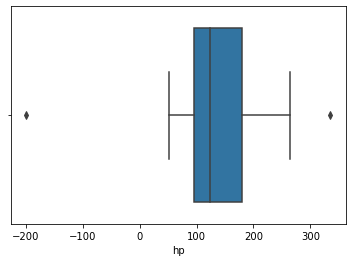

In [247]:
# 2. 
sns.boxplot(x=coches['hp'])

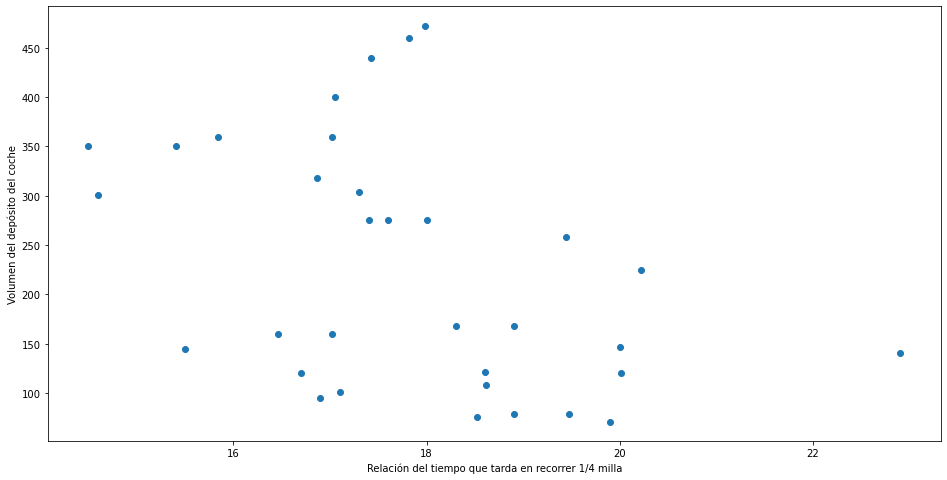

In [248]:
# 3.
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(coches['qsec'], coches['disp'])
ax.set_xlabel('Relación del tiempo que tarda en recorrer 1/4 milla')
ax.set_ylabel('Volumen del depósito del coche')
plt.show()

In [252]:
# 4. 
Q1 = coches['hp'].quantile(0.25)
Q3 = coches['hp'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

85.0


In [255]:
mask4 = (coches['hp'] < Q1 - 1.5*IQR) | (coches['hp'] > Q3 + 1.5*IQR)
mask4

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28     True
29    False
30    False
31     True
32    False
Name: hp, dtype: bool

In [258]:
df3 = coches[mask4]
df3

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
28,Renault Clio Need For Speed,32.1,4,101.4,-200,4.01,1.293,17.1,1,1,5,2
31,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8


In [266]:
# 5. 
df5 = coches[~mask4]
df5

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [269]:
# 6.

max_hp = df5['hp'].max()
min_hp = df5['hp'].min()

def sustituye(x):
    if x < min_hp:
        return min_hp
    elif x > max_hp:
        return max_hp
    else:
        return x

df6 = coches.copy()

df6['hp'] = df6['hp'].apply(lambda x: sustituye(x))
df6

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [272]:
coches.loc[coches['hp'] > Q3 + 1.5*IQR, ['hp']]

,hp
31,335


In [277]:
np.random.choice(coches['hp'].values, size=2, p=[0.2, 0.7, 0.1])

ValueError: 'a' and 'p' must have same size

In [276]:
coches['hp'].values

array([ 110,  110,   93,  110,  175,  105,  245,   62,   95,  123,  123,
        180,  180,  180,  205,  215,  230,   66,   52,   65,   97,  150,
        150,  245,  175,   66,   91,  113, -200,  264,  175,  335,  109],
      dtype=int64)